In [1]:
import matplotlib.pyplot as plt
plt.style.use('jupyter_dark')
figsize = plt.rcParams['figure.figsize']

In [27]:
import networkx as nx
import numpy as np
import math
import os
from interarray.farmrepo_landscape import g
from interarray.geometric import A_graph
from interarray.plotting import gplot
from interarray.crossings import get_crossings_list, gateXing_iter
from interarray.interarraylib import NodeTagger

In [30]:
F = NodeTagger()

In [3]:
from interarray.MILP.pyomo import make_MILP_length, MILP_solution_to_G
# from interarray.MILP.ortools import make_MILP_length, MILP_solution_to_G, cp_model

In [4]:
from pyomo import environ as pyo

In [5]:
os.getpid()

28108

use `windows-kill -SIGINT «PID»` to stop Gurobi solver early

## choose site from here

In [ ]:
G_base = g.rbn

In [ ]:
G_base = g.anholt

In [ ]:
G_base = g.sands

In [ ]:
G_base = g.horns

In [ ]:
G_base = g.london

## Model setup

In [5]:
G_base = g.rbs
m = make_MILP_length(A_graph(G_base),
                     gateXings_constraint=True,
                     branching=False,
                     gates_limit=True)

### Instantiate the model

In [16]:
k = 6
p = m.create_instance(data={None: dict(k={None: k})}, name=f'{m.site["name"]}_k{k}')

In [ ]:
k = 8
p = m.create_instance(data={None: dict(k={None: k})}, name=f'{m.site["name"]}_k{k}')

In [ ]:
k = 13
p = m.create_instance(data={None: dict(k={None: k})}, name=f'{A.graph["name"]}_k{k}')

## Solve with HiGHS

HiGHS is not outputting to the notebook cell, its output shows up in the jupyter-server console.

In [10]:
solver = pyo.SolverFactory('appsi_highs')
solver.available()

True

In [11]:
solver.options = {
    'time_limit': 600,
    'mip_rel_gap': 0.015,
    'parallel': 'on',  # seems to have no effect
}

[Parallel · HiGHS Documentation](https://ergo-code.github.io/HiGHS/parallel.html)

> The only parallel computation currently implemented in the MIP solver occurs when performing symmetry detection on the problem, and when querying clique tables. This parallelism is always advantageous, so is performed regardless of the value of the parallel option.

>The MIP solver has been written with parallel tree seach in mind, and it is hoped that this will be implemented before the end of 2024. The parallel LP solver will also enhance the MIP solver performance by speeding up the solution of the root node.

In [12]:
status = solver.solve(p, tee=True)

In [18]:
status.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: 83743.99003951909
  Upper bound: 83751.61147191779
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: 1
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Termination message: TerminationCondition.optimal
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


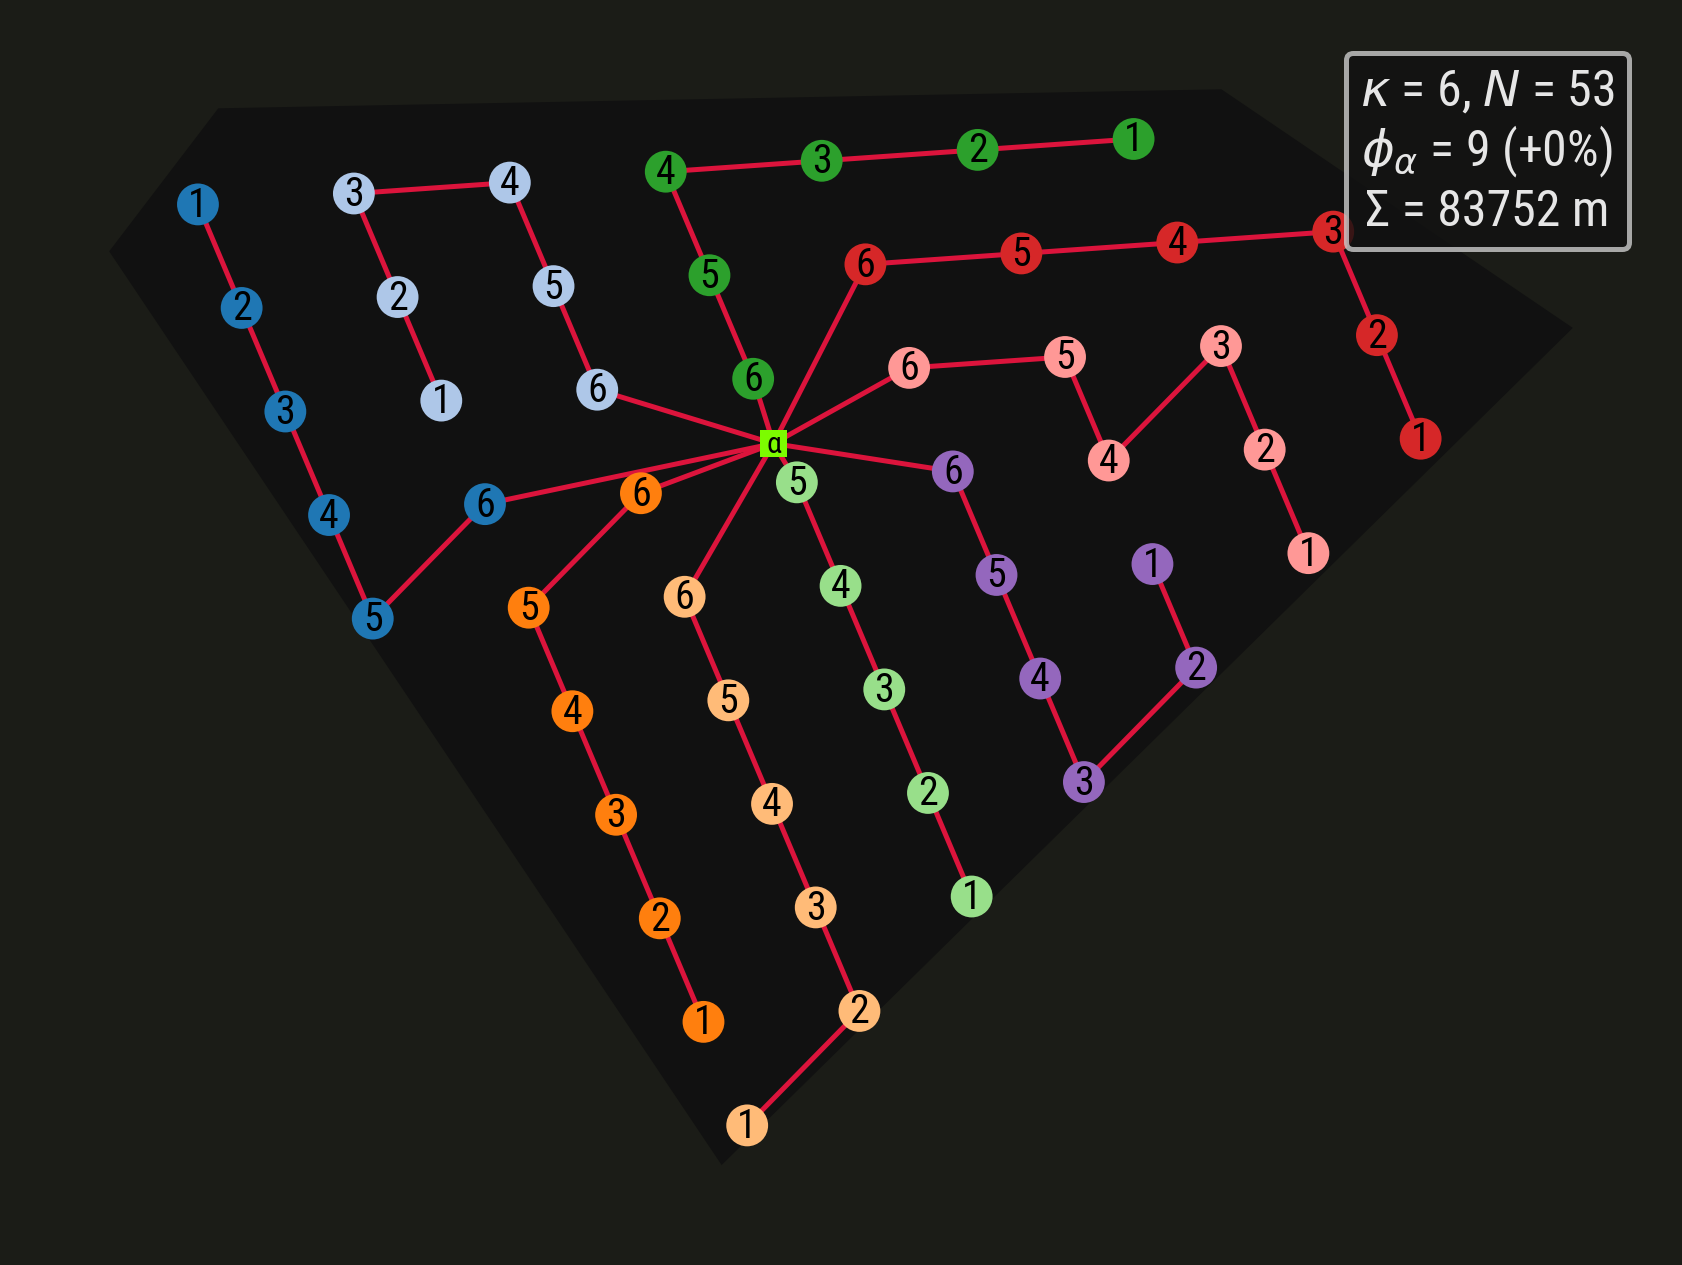

In [15]:
G = MILP_solution_to_G(p)
gplot(G);

## Solve with CBC

In [21]:
solver = pyo.SolverFactory('cbc')
solver.available()

True

In [25]:
solver.options = {
    'seconds': 20,
    'ratio': 0.05,
    'threads': 16,
}

In [26]:
status = solver.solve(p, tee=True)

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 18 2023 

command line - C:\Users\s213184\programs\shims\cbc.exe -seconds 20 -ratio 0.05 -threads 16 -printingOptions all -import C:\Users\s213184\AppData\Local\Temp\tmpydtg_4h6.pyomo.lp -stat=1 -solve -solu C:\Users\s213184\AppData\Local\Temp\tmpydtg_4h6.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 20
ratioGap was changed from 0 to 0.05
No match for threads - ? for list of commands
No match for 16 - ? for list of commands
Option for printingOptions changed from normal to all
Presolve 1712 (-55) rows, 1066 (-1) columns and 6528 (-160) elements
Statistics for presolved model
Original problem has 1066 integers (533 of which binary)
Presolved problem has 1066 integers (533 of which binary)
==== 533 zero objective 137 different
==== absolute objective values 137 different
==== for integers 533 zero objective 137 different
==== for integers absolute objective values 137 different
===== end objective coun

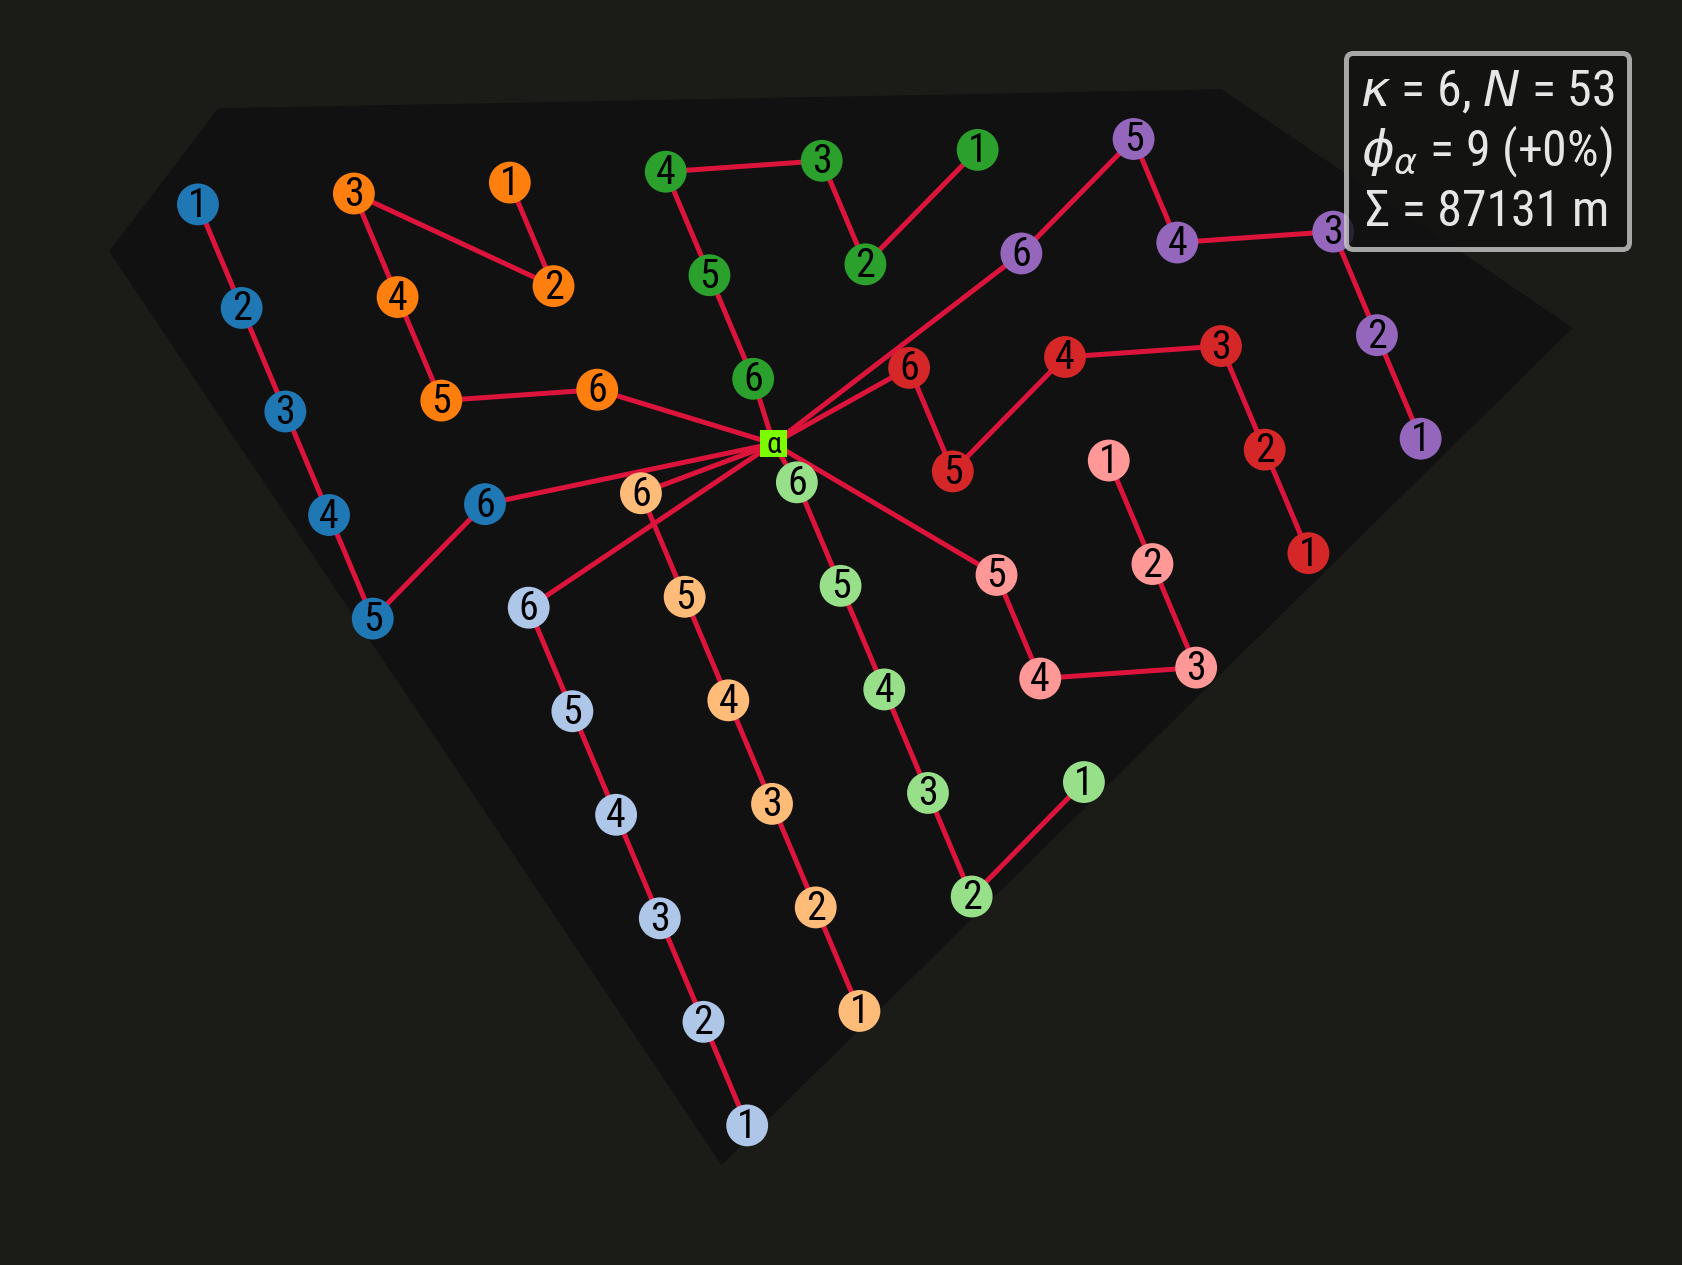

In [27]:
G = MILP_solution_to_G(p)
gplot(G);

In [41]:
status = solver.solve(p, tee=True)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: Feb 21 2023 

command line - C:\Users\s213184\programs\shims\cbc.exe -seconds 200 -ratio 0.02 -threads 16 -printingOptions all -import C:\Users\s213184\AppData\Local\Temp\tmpgyhlscvx.pyomo.lp -stat=1 -solve -solu C:\Users\s213184\AppData\Local\Temp\tmpgyhlscvx.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 200
ratioGap was changed from 0 to 0.02
threads was changed from 0 to 16
Option for printingOptions changed from normal to all
Presolve 1531 (-4) rows, 1040 (-3) columns and 4834 (-516) elements
Statistics for presolved model
Original problem has 1042 integers (521 of which binary)
Presolved problem has 1040 integers (519 of which binary)
==== 521 zero objective 145 different
==== absolute objective values 145 different
==== for integers 521 zero objective 145 different
==== for integers absolute objective values 145 different
===== end objective counts


Problem has 1531 rows, 1040 columns (519 with obj

ApplicationError: Solver (cbc) did not exit normally

In [63]:
status = solver.solve(p, tee=True, logfile="cbc.log")

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  5 2022 

command line - C:\Users\s213184\programs\cbc\bin\cbc.exe -seconds 200 -ratio 0.02 -printingOptions all -import C:\Users\s213184\docs\learning\mlopt\milp\tmpv2kclzxu.pyomo.lp -stat=1 -solve -solu C:\Users\s213184\docs\learning\mlopt\milp\tmpv2kclzxu.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 200
ratioGap was changed from 0 to 0.02
Option for printingOptions changed from normal to all
Presolve 1531 (-4) rows, 1040 (-3) columns and 4834 (-516) elements
Statistics for presolved model
Original problem has 1042 integers (521 of which binary)
Presolved problem has 1040 integers (519 of which binary)
==== 521 zero objective 145 different
==== absolute objective values 145 different
==== for integers 521 zero objective 145 different
==== for integers absolute objective values 145 different
===== end objective counts


Problem has 1531 rows, 1040 columns (519 with objective) and 4834 elements
Colum

In [61]:
status = solver.solve(p, tee=True)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  9 2022 

command line - /usr/bin/cbc -seconds 200 -ratio 0.02 -threads 8 -printingOptions all -import /tmp/tmpgks6ug1m.pyomo.lp -stat=1 -solve -solu /tmp/tmpgks6ug1m.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 200
ratioGap was changed from 0 to 0.02
threads was changed from 0 to 8
Option for printingOptions changed from normal to all
Presolve 2446 (-3) rows, 1659 (-2) columns and 7732 (-829) elements
Statistics for presolved model
Original problem has 1660 integers (830 of which binary)
Presolved problem has 1659 integers (829 of which binary)
==== 830 zero objective 123 different
==== absolute objective values 123 different
==== for integers 830 zero objective 123 different
==== for integers absolute objective values 123 different
===== end objective counts


Problem has 2446 rows, 1659 columns (829 with objective) and 7732 elements
Column breakdown:
0 of type 0.0->inf, 830 of type 0.0->up, 0 of t

In [62]:
status.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 57967.921
  Upper bound: 59340.97928526
  Number of objectives: 1
  Number of constraints: 2446
  Number of variables: 1659
  Number of binary variables: 830
  Number of integer variables: 1660
  Number of nonzeros: 829
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: aborted
  User time: -1.0
  System time: 200.3
  Wallclock time: 56.04
  Termination condition: maxTimeLimit
  Termination message: Optimization terminated because the time expended exceeded the value specified in the seconds pa

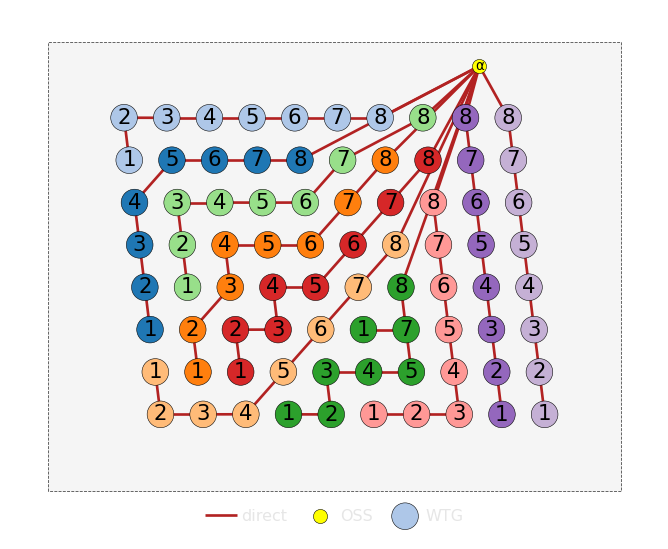

In [63]:
Gsol = G_base.copy()

for n, Bg in p.Bg.items():
    if pyo.value(Bg):
        Gsol.add_edge(n, A.nodes[n]['root'])
for (u, v), Be in p.Be.items():
    if pyo.value(Be):
        Gsol.add_edge(u, v)

calcload(Gsol)
gplot(Gsol);

In [85]:
status = solver.solve(p, tee=True)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  5 2022 

command line - C:\Users\s213184\programs\cbc\bin\cbc.exe -seconds 200 -ratio 0.05 -threads 16 -printingOptions all -import C:\Users\s213184\AppData\Local\Temp\tmprxx4469s.pyomo.lp -stat=1 -solve -solu C:\Users\s213184\AppData\Local\Temp\tmprxx4469s.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 200
ratioGap was changed from 0 to 0.05
No match for threads - ? for list of commands
No match for 16 - ? for list of commands
Option for printingOptions changed from normal to all
Presolve 1590 (-19) rows, 1083 (-18) columns and 4991 (-490) elements
Statistics for presolved model
Original problem has 1100 integers (550 of which binary)
Presolved problem has 1083 integers (534 of which binary)
==== 559 zero objective 126 different
==== absolute objective values 123 different
==== for integers 559 zero objective 126 different
==== for integers absolute objective values 123 different
===== end objective 

In [86]:
status.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 58070.084
  Upper bound: 61607.51286724
  Number of objectives: 1
  Number of constraints: 1590
  Number of variables: 1083
  Number of binary variables: 550
  Number of integer variables: 1100
  Number of nonzeros: 524
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: aborted
  User time: -1.0
  System time: 200.33
  Wallclock time: 200.33
  Termination condition: maxTimeLimit
  Termination message: Optimization terminated because the time expended exceeded the value specified in the seconds 

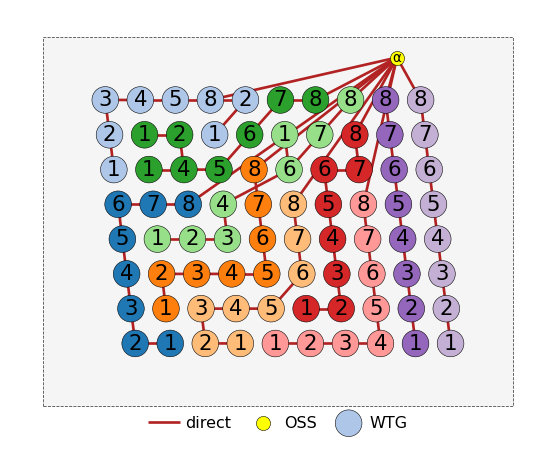

In [87]:
Gsol = G_base.copy()

for n, Bg in p.Bg.items():
    if pyo.value(Bg):
        Gsol.add_edge(n, A.nodes[n]['root'])
for (u, v), Be in p.Be.items():
    if pyo.value(Be):
        Gsol.add_edge(u, v)

calcload(Gsol)
gplot(Gsol);

In [76]:
status = solver.solve(p, tee=True)

Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: May  5 2022 

command line - C:\Users\s213184\programs\cbc\bin\cbc.exe -seconds 200 -ratio 0.05 -printingOptions all -import C:\Users\s213184\AppData\Local\Temp\tmpvhcurq4y.pyomo.lp -stat=1 -solve -solu C:\Users\s213184\AppData\Local\Temp\tmpvhcurq4y.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 200
ratioGap was changed from 0 to 0.05
Option for printingOptions changed from normal to all
Presolve 1590 (-19) rows, 1083 (-18) columns and 4991 (-490) elements
Statistics for presolved model
Original problem has 1100 integers (550 of which binary)
Presolved problem has 1083 integers (534 of which binary)
==== 559 zero objective 126 different
==== absolute objective values 123 different
==== for integers 559 zero objective 126 different
==== for integers absolute objective values 123 different
===== end objective counts


Problem has 1590 rows, 1083 columns (524 with objective) and 4991 elements
Column breakdow

In [77]:
status.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 58110.103
  Upper bound: 61773.06020986
  Number of objectives: 1
  Number of constraints: 1590
  Number of variables: 1083
  Number of binary variables: 550
  Number of integer variables: 1100
  Number of nonzeros: 524
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: aborted
  User time: -1.0
  System time: 200.27
  Wallclock time: 200.27
  Termination condition: maxTimeLimit
  Termination message: Optimization terminated because the time expended exceeded the value specified in the seconds 

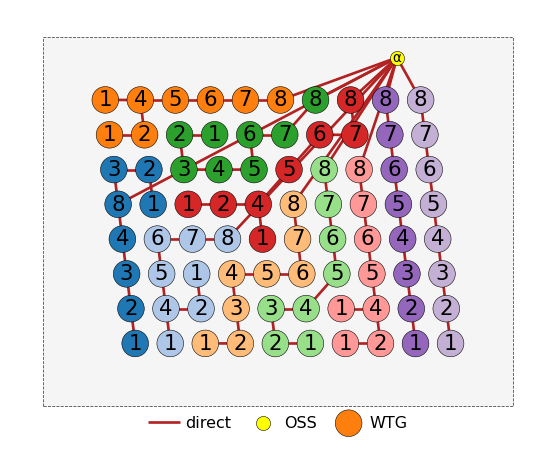

In [78]:
Gsol = G_base.copy()

for n, Bg in p.Bg.items():
    if pyo.value(Bg):
        Gsol.add_edge(n, A.nodes[n]['root'])
for (u, v), Be in p.Be.items():
    if pyo.value(Be):
        Gsol.add_edge(u, v)

calcload(Gsol)
gplot(Gsol);

## Solve with SCIP

SCIP is not working. The temporary file passed to the solver `«...».pyomo.nl` is listing variable values as boolean, but the solver expects floating point numbers.

In [6]:
solver = pyo.SolverFactory('scip')
solver.available()

True

In [7]:
solver.options = {
    'limits/gap': 0.13,
    'limits/time': 120.,
    'display/freq': 0.5,
    # this is currently useless, as pyomo is not calling the concurrent solver
    'parallel/maxnthreads': 16,  # TODO: get cpu affinity
}

### horns, k = 8, non-branching

In [8]:
G_base = g.horns
m = make_MILP_length(A_graph(G_base),
                     gateXings_constraint=True,
                     branching=False,
                     gates_limit=True)
k = 8
p = m.create_instance(data={None: dict(k={None: k})}, name=f'{m.site["name"]}_k{k}')

In [9]:
status = solver.solve(p, tee=True)

SCIP version 8.0.3 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: Soplex 6.0.3] [GitHash: 62fab8a2e3]
Copyright (C) 2002-2022 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External libraries: 
  Soplex 6.0.3         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: f900e3d0]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (github.com/coin-or/CppAD)
  ZLIB 1.2.13          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  AMPL/MP 4e2d45c4     AMPL .nl file reader library (github.com/ampl/mp)
  PaPILO 2.1.2         parallel presolve for integer and linear optimization (github.com/scipopt/papilo) [GitHash: 2fe2543]
  bliss 0.77           Computing Graph Automorphism Groups by T. Junttila and P. Kaski (www.tcs.hut.fi/Software/bliss/)
  Ipopt 3.14.11        Interior Point Optimizer developed by A. Waechter et.al. (github.com/coin-or/Ipopt)

reading user para

ApplicationError: Solver (scip) did not exit normally

In [10]:
status.write()

NameError: name 'status' is not defined

In [ ]:
G = MILP_solution_to_G(p)
gplot(G);

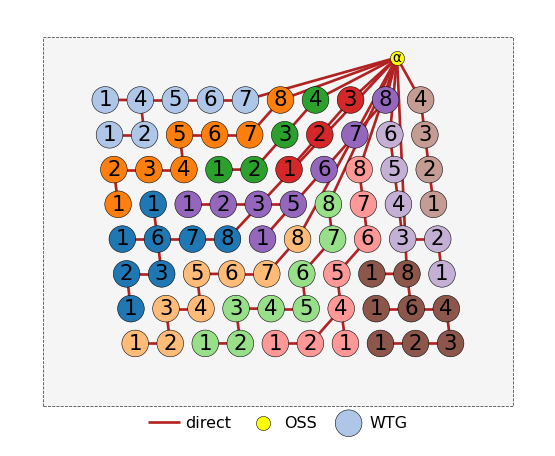

In [62]:
Gsol = G_base.copy()

for n, Bg in p.Bg.items():
    if pyo.value(Bg):
        Gsol.add_edge(n, A.nodes[n]['root'])
for (u, v), Be in p.Be.items():
    if pyo.value(Be):
        Gsol.add_edge(u, v)

calcload(Gsol)
gplot(Gsol);

In [37]:
status = solver.solve(p, tee=True)

SCIP version 8.0.3 [precision: 8 byte] [memory: block] [mode: optimized] [LP solver: Soplex 6.0.3] [GitHash: 62fab8a2e3]
Copyright (C) 2002-2022 Konrad-Zuse-Zentrum fuer Informationstechnik Berlin (ZIB)

External libraries: 
  Soplex 6.0.3         Linear Programming Solver developed at Zuse Institute Berlin (soplex.zib.de) [GitHash: f900e3d0]
  CppAD 20180000.0     Algorithmic Differentiation of C++ algorithms developed by B. Bell (github.com/coin-or/CppAD)
  ZLIB 1.2.13          General purpose compression library by J. Gailly and M. Adler (zlib.net)
  AMPL/MP 4e2d45c4     AMPL .nl file reader library (github.com/ampl/mp)
  PaPILO 2.1.2         parallel presolve for integer and linear optimization (github.com/scipopt/papilo) [GitHash: 2fe2543]
  bliss 0.77           Computing Graph Automorphism Groups by T. Junttila and P. Kaski (www.tcs.hut.fi/Software/bliss/)
  Ipopt 3.14.11        Interior Point Optimizer developed by A. Waechter et.al. (github.com/coin-or/Ipopt)

reading user para

In [38]:
status.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 1100
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: gap limit reached
  Termination condition: other
  Id: 405
  Error rc: 0
  Time: 196.0
  Gap: 4.97
  Primal bound: 60859.4872202893
  Dual bound: 57975.8854486447
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0


In [39]:
print("Objective = %f" % pyo.value(p.length))

Objective = 60859.487220


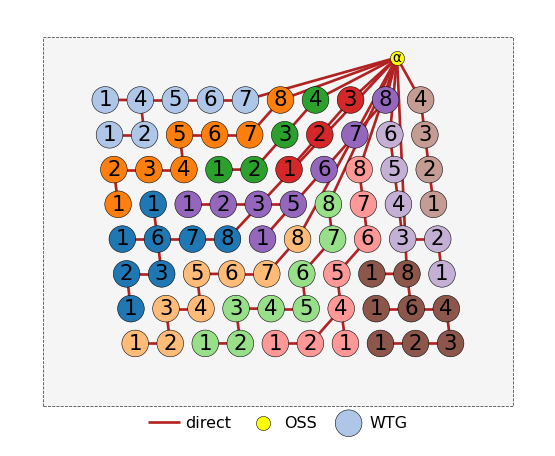

In [56]:
Gsol = G_base.copy()

for n, Bg in p.Bg.items():
    if pyo.value(Bg):
        Gsol.add_edge(n, A.nodes[n]['root'])
for (u, v), Be in p.Be.items():
    if pyo.value(Be):
        Gsol.add_edge(u, v)

calcload(Gsol)
gplot(Gsol);

## Solve with GLPK

In [27]:
solver = pyo.SolverFactory('glpk')

In [30]:
solver.options = {
    'tmlim': 600,  # [s]
    'mipgap': 0.08,
}

In [31]:
status = solver.solve(p, tee=True)
# solver.solve(p, warmstart=True, tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --mipgap 0.05 --write C:\Users\s213184\AppData\Local\Temp\tmpiz2e3q1y.glpk.raw
 --wglp C:\Users\s213184\AppData\Local\Temp\tmplaky6ylg.glpk.glp --cpxlp C:\Users\s213184\AppData\Local\Temp\tmpvgptflpc.pyomo.lp
Reading problem data from 'C:\Users\s213184\AppData\Local\Temp\tmpvgptflpc.pyomo.lp'...
C:\Users\s213184\AppData\Local\Temp\tmpvgptflpc.pyomo.lp:12518: warning: lower bound of variable 'x1' redefined
C:\Users\s213184\AppData\Local\Temp\tmpvgptflpc.pyomo.lp:12518: warning: upper bound of variable 'x1' redefined
1609 rows, 1101 columns, 5481 non-zeros
1100 integer variables, 550 of which are binary
13068 lines were read
Writing problem data to 'C:\Users\s213184\AppData\Local\Temp\tmplaky6ylg.glpk.glp'...
10904 lines were written
GLPK Integer Optimizer 5.0
1609 rows, 1101 columns, 5481 non-zeros
1100 integer variables, 550 of which are binary
Preprocessing...
470 constraint coefficient(s) were reduced
1608 ro

ApplicationError: Solver (glpk) did not exit normally

## Solve with Gurobi

In [12]:
solver = pyo.SolverFactory('gurobi', solver_io='python')
solver.available()

True

### horns, k = 8, non-branching

In [13]:
G_base = g.horns
m = make_MILP_length(A_graph(G_base),
                     gateXings_constraint=True,
                     branching=False,
                     gates_limit=True)
k = 8
p = m.create_instance(data={None: dict(k={None: k})}, name=f'{m.site["name"]}_k{k}')

In [14]:
status = solver.solve(p, tee=True)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Academic license - for non-commercial use only - registered to masoda@dtu.dk
Optimize a model with 4284 rows, 1672 columns and 15209 nonzeros
Model fingerprint: 0x17bb4073
Variable types: 0 continuous, 1672 integer (836 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [6e+02, 6e+03]
  Bounds range     [1e+00, 8e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 977 rows and 4 columns
Presolve time: 0.03s
Presolved: 3307 rows, 1668 columns, 14078 nonzeros
Variable types: 0 continuous, 1668 integer (834 binary)

Root relaxation: objective 5.721115e+04, 1764 iterations, 0.04 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent

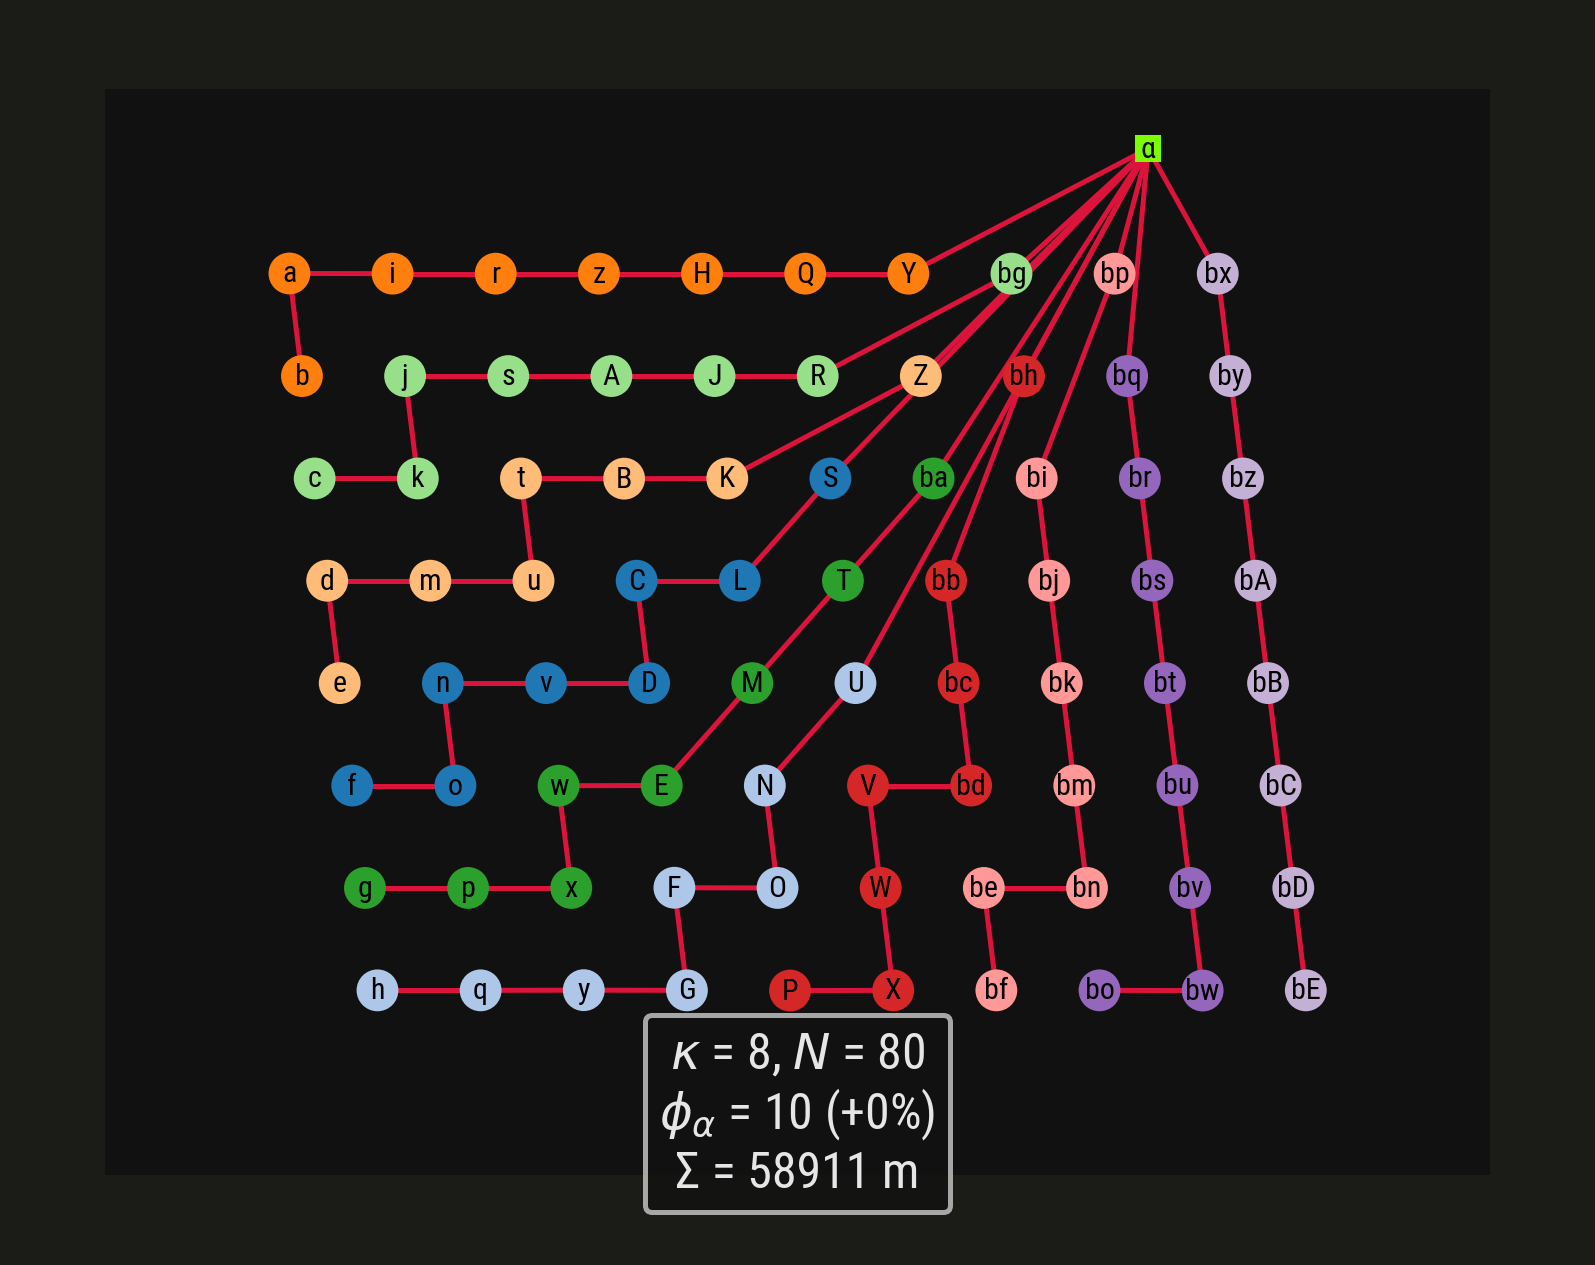

In [15]:
G = MILP_solution_to_G(p)
gplot(G, node_tag='label');

### thanet, 3, using interarray.MILP

In [17]:
m = make_MILP_length(A_graph(g.thanet), gateXings_constraint=True)

In [18]:
k = 3
p = m.create_instance(data={None: dict(k={None: k})}, name=f'{m.site["name"]}_k{k}')

In [19]:
solver.options = {
    'MIPGap': 0.01,
    'TimeLimit': 20,
}

In [20]:
status = solver.solve(p, tee=True)

Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 20
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Academic license - for non-commercial use only - registered to masoda@dtu.dk
Optimize a model with 5569 rows, 2108 columns and 18925 nonzeros
Model fingerprint: 0xabcbc5d9
Variable types: 0 continuous, 2108 integer (1054 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [2e+02, 5e+03]
  Bounds range     [1e+00, 3e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 1280 rows and 0 columns
Presolve time: 0.04s
Presolved: 4289 rows, 2108 columns, 17958 nonzeros
Variable types: 0 continuous, 2108 integer (1054 binary)
Found heuristic solution: objective 240150.49133

Root relaxation: objective 9.698513e+04, 2485 iterations, 0.05 seconds (0.05 work uni

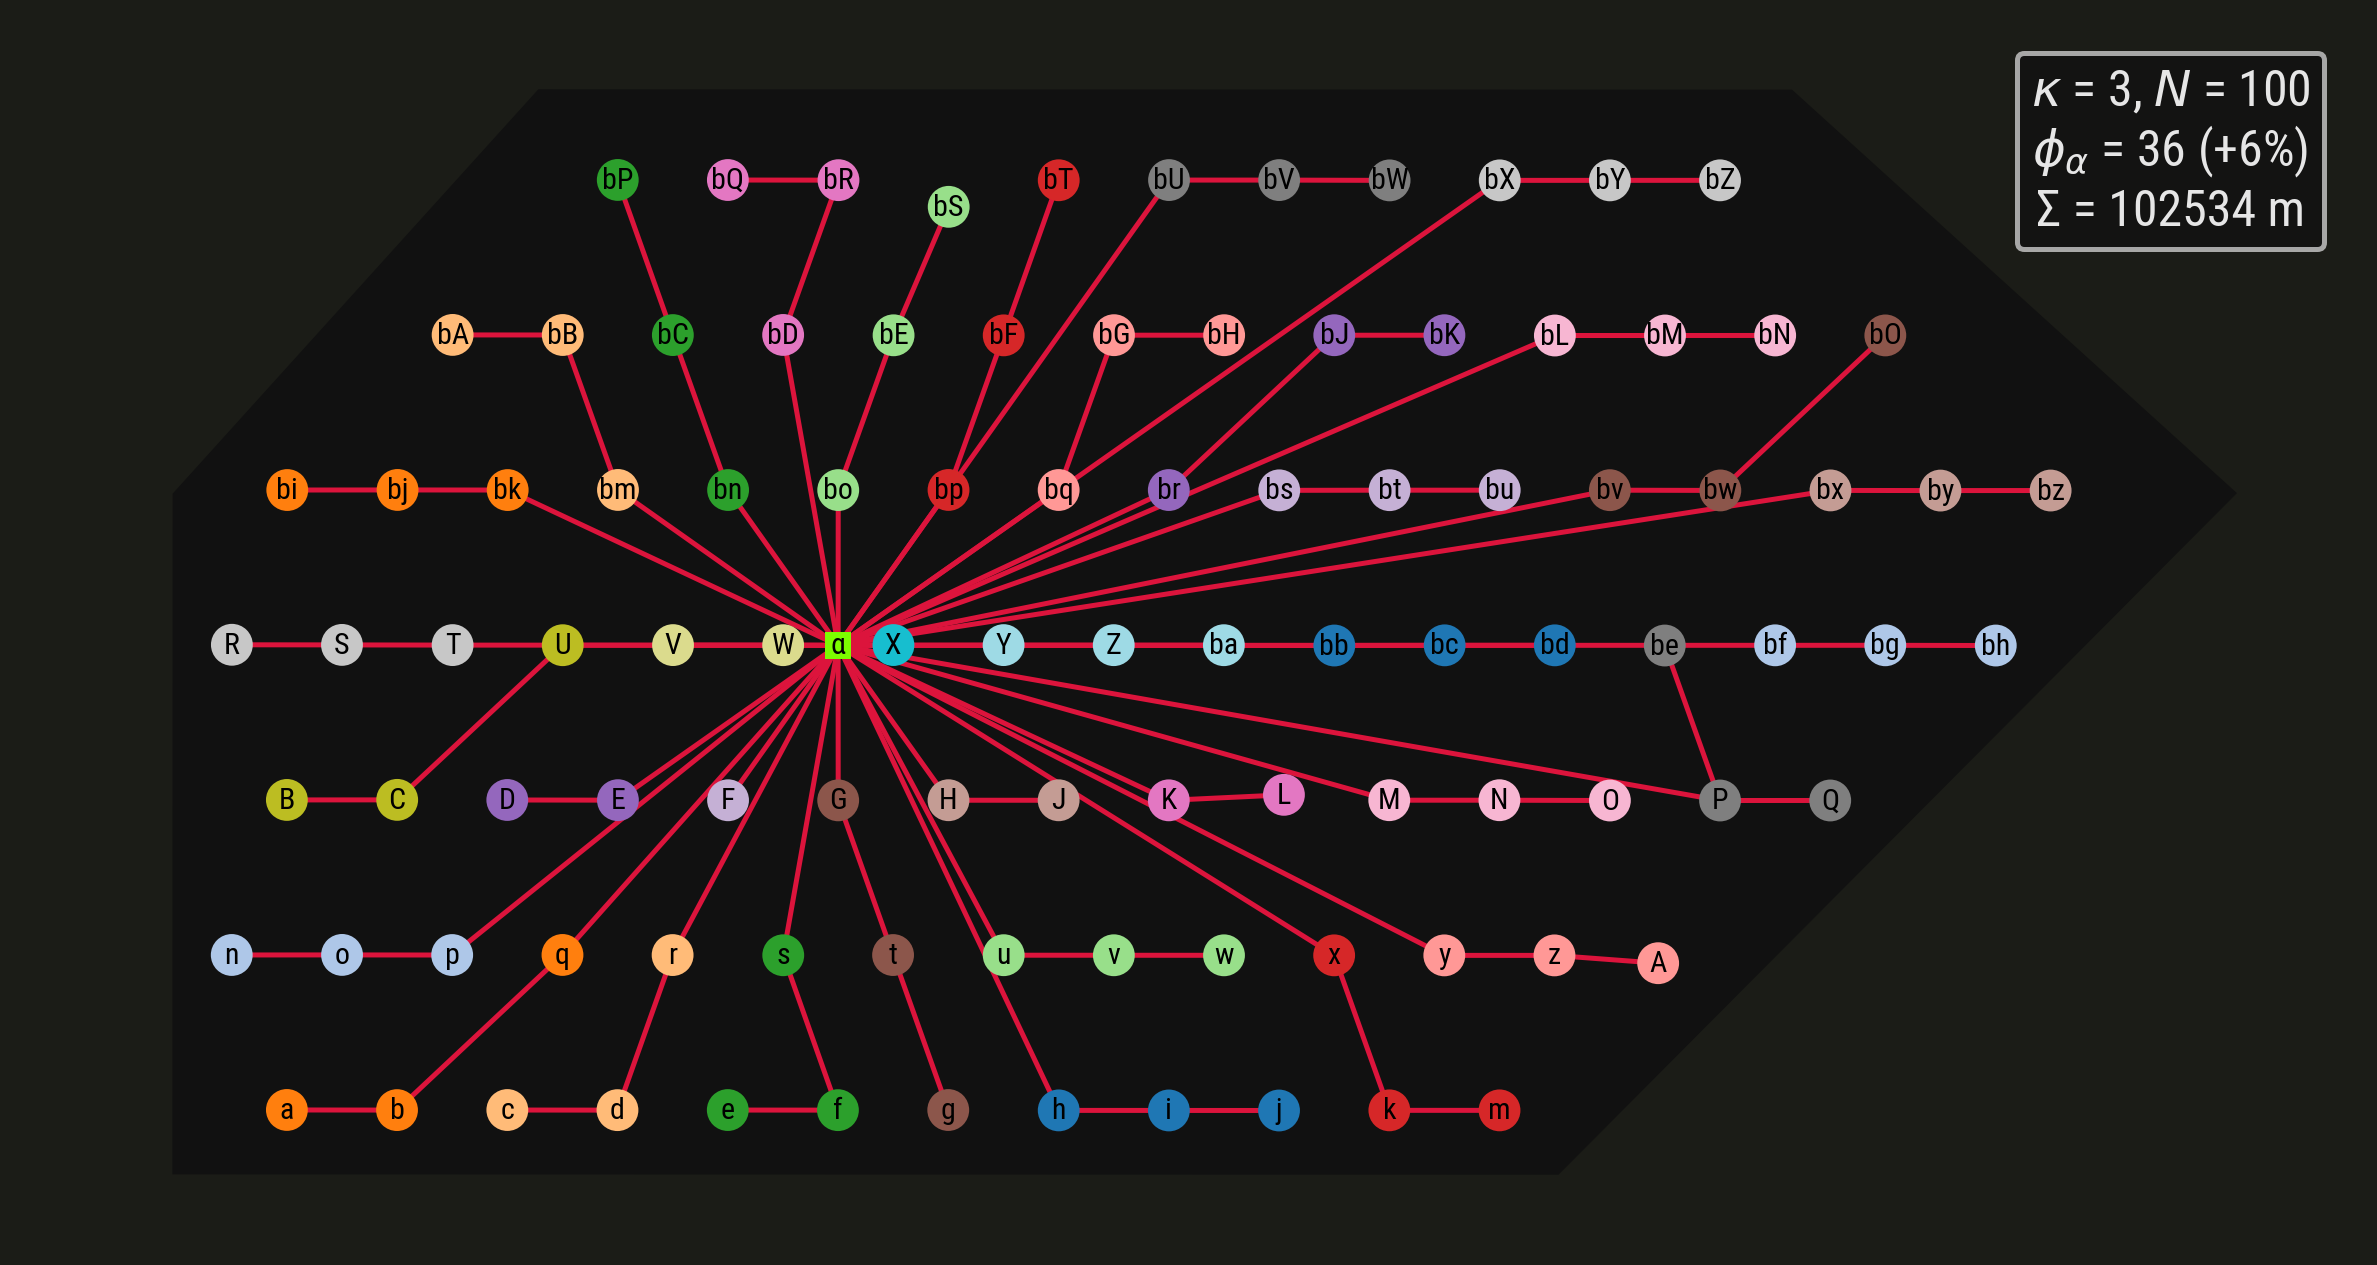

In [32]:
G = MILP_solution_to_G(p)
gplot(G, node_tag='label');

In [31]:
Xings = list(gateXing_iter(G))

list(tuple(F[n] for n in X) for X in Xings)

[('k', 'x', 'α', 'm'),
 ('u', 'v', 'α', 'i'),
 ('v', 'w', 'α', 'j'),
 ('v', 'w', 'α', 'k'),
 ('C', 'U', 'α', 'B'),
 ('D', 'E', 'α', 'n'),
 ('D', 'E', 'α', 'o'),
 ('H', 'J', 'α', 'j'),
 ('H', 'J', 'α', 'k'),
 ('H', 'J', 'α', 'm'),
 ('H', 'J', 'α', 'v'),
 ('H', 'J', 'α', 'w'),
 ('K', 'L', 'α', 'z'),
 ('K', 'L', 'α', 'A'),
 ('P', 'be', 'α', 'Q'),
 ('bb', 'bc', 'α', 'bd'),
 ('bb', 'bc', 'α', 'be'),
 ('bb', 'bc', 'α', 'bh'),
 ('bm', 'bB', 'α', 'bA'),
 ('bm', 'bB', 'α', 'bB'),
 ('bo', 'bE', 'α', 'bR'),
 ('bq', 'bG', 'α', 'bG'),
 ('bq', 'bG', 'α', 'bH'),
 ('bq', 'bG', 'α', 'bV'),
 ('bq', 'bG', 'α', 'bW'),
 ('br', 'bJ', 'α', 'bK'),
 ('br', 'bJ', 'α', 'bY'),
 ('br', 'bJ', 'α', 'bZ'),
 ('bs', 'bt', 'α', 'bN'),
 ('bs', 'bt', 'α', 'bO'),
 ('bC', 'bP', 'α', 'bP'),
 ('bG', 'bH', 'α', 'bV'),
 ('bG', 'bH', 'α', 'bW'),
 ('bJ', 'bK', 'α', 'bY'),
 ('bJ', 'bK', 'α', 'bZ')]

it is working!! (somewhat)

when there are multiple crossings by one gate, only the crossing closest to root should be entered in the detour function.

In [14]:
for X in Xings:
    print(tuple(F[n] for n in X))
    u, v, dst, org = X
    det = detour(G, dst, org, dst, u, v, G.graph['gnT'][u], savings=1000000)
    if det is not None:
        path, cost, LoNotHi, shift = det
        print(tuple(F[n] for n in path))
    else:
        print(tuple(F[n] for n in X[-2:]), ': detour not found')

('v', 'w', 'α', 'j')
('α', 'j') : detour not found
('E', 'F', 'α', 'p')
('p', 'E')
('E', 'F', 'α', 'q')
('q', 'F')
('H', 'J', 'α', 'j')
('j', 'H')
('H', 'J', 'α', 'v')
('v', 'H')
('J', 'K', 'α', 'y')
('y', 'K')
('U', 'V', 'α', 'T')
<plan_detour[6]> max depth (5)exceeded.
('T', 'U')
('ba', 'bb', 'α', 'bc')
<plan_detour[6]> max depth (5)exceeded.
('bc', 'bb')
('ba', 'bb', 'α', 'bf')
('bf', 'Z')
('bo', 'bp', 'α', 'bE')
('bE', 'bo')
('bo', 'bp', 'α', 'bF')
('bF', 'bo')
('bp', 'bq', 'α', 'bU')
('bU', 'bo')
('br', 'bs', 'α', 'bM')
('bM', 'br')
('bF', 'bG', 'α', 'bU')
('α', 'bU') : detour not found


### london, 13, using bug-fixed interarray.MILP

In [10]:
m = make_MILP_length(A_graph(g.london), gateXings_constraint=True)

In [11]:
k = 13
p = m.create_instance(data={None: dict(k={None: k})}, name=f'{m.site["name"]}_k{k}')

In [12]:
solver.options['MIPGap'] = 0.05
status = solver.solve(p, tee=True)
# solver.solve(p, warmstart=True, tee=True)

Set parameter MIPGap to value 0.05
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Academic license - for non-commercial use only - registered to masoda@dtu.dk
Optimize a model with 30007 rows, 4144 columns and 69318 nonzeros
Model fingerprint: 0x4c3edec2
Variable types: 0 continuous, 4144 integer (2072 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [6e+02, 1e+04]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 2e+02]
Presolve removed 15298 rows and 0 columns
Presolve time: 0.15s
Presolved: 14709 rows, 4144 columns, 55853 nonzeros
Variable types: 0 continuous, 4144 integer (2072 binary)
Found heuristic solution: objective 991685.05249

Root relaxation: objective 1.277325e+05, 4853 iterations, 0.13 seconds (0.16 work units)

    Nodes    |    Current No

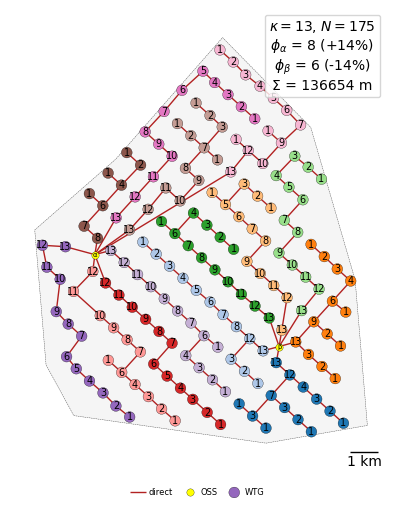

In [13]:
G = MILP_solution_to_G(p)
gplot(G);

In [14]:
solver._solver_model.SolCount

10

In [16]:
solver._solver_model.params.SolutionNumber

0

In [ ]:
xs=[]
for s in range(solver._solver_model.SolCount):
   solver._solver_model.params.SolutionNumber = s
   x=solver._solver_model.getAttr("Xn")
   xs.append(x)
solver._solver_model.params.SolutionNumber = 0

In [46]:
solver._solver_model.params.SolutionNumber = 1
all(np.array(tuple(var.X for var in solver._solver_model.getVars())) == solver._solver_model.getAttr("Xn"))

False

### london, 13, using interarray.MILP

In [11]:
m = make_MILP_length(A_graph(g.london))

In [12]:
k = 13
p = m.create_instance(data={None: dict(k={None: k})}, name=f'{m.site["name"]}_k{k}')

In [14]:
solver.options['MIPGap'] = 0.05
status = solver.solve(p, tee=True)
# solver.solve(p, warmstart=True, tee=True)

Set parameter MIPGap to value 0.05
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Academic license - for non-commercial use only - registered to masoda@dtu.dk
Optimize a model with 6073 rows, 4144 columns and 21450 nonzeros
Model fingerprint: 0x1405317e
Variable types: 0 continuous, 4144 integer (2072 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [6e+02, 1e+04]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 2e+02]
Presolve removed 176 rows and 0 columns
Presolve time: 0.02s
Presolved: 5897 rows, 4144 columns, 19028 nonzeros
Variable types: 0 continuous, 4144 integer (2072 binary)
Found heuristic solution: objective 488514.19883

Root relaxation: objective 1.277325e+05, 4609 iterations, 0.07 seconds (0.11 work units)

    Nodes    |    Current Node  

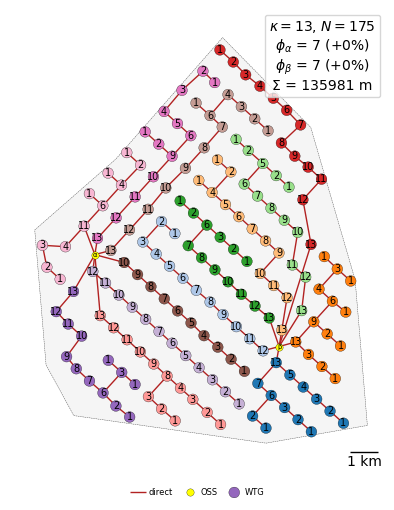

In [15]:
G = MILP_solution_to_G(p)
gplot(G);

### dantysk, 8, using interarray.MILP

In [38]:
m = make_MILP_length(A_graph(g.dantysk),
                     branching=False)

In [39]:
k = 8
p = m.create_instance(data={None: dict(k={None: k})}, name=f'{m.site["name"]}_k{k}')

In [40]:
solver.options = {
    'MIPGap': 0.01,
    'TimeLimit': 20,
}

In [41]:
status = solver.solve(p, tee=True)

Set parameter MIPGap to value 0.01
Set parameter TimeLimit to value 20
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Academic license - for non-commercial use only - registered to masoda@dtu.dk
Optimize a model with 2356 rows, 1400 columns and 8662 nonzeros
Model fingerprint: 0x5ad58c8b
Variable types: 0 continuous, 1400 integer (700 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [6e+02, 1e+04]
  Bounds range     [1e+00, 8e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 350 rows and 0 columns
Presolve time: 0.02s
Presolved: 2006 rows, 1400 columns, 7343 nonzeros
Variable types: 0 continuous, 1400 integer (700 binary)
Found heuristic solution: objective 464650.68601

Root relaxation: objective 8.879879e+04, 1502 iterations, 0.02 seconds (0.03 work units)



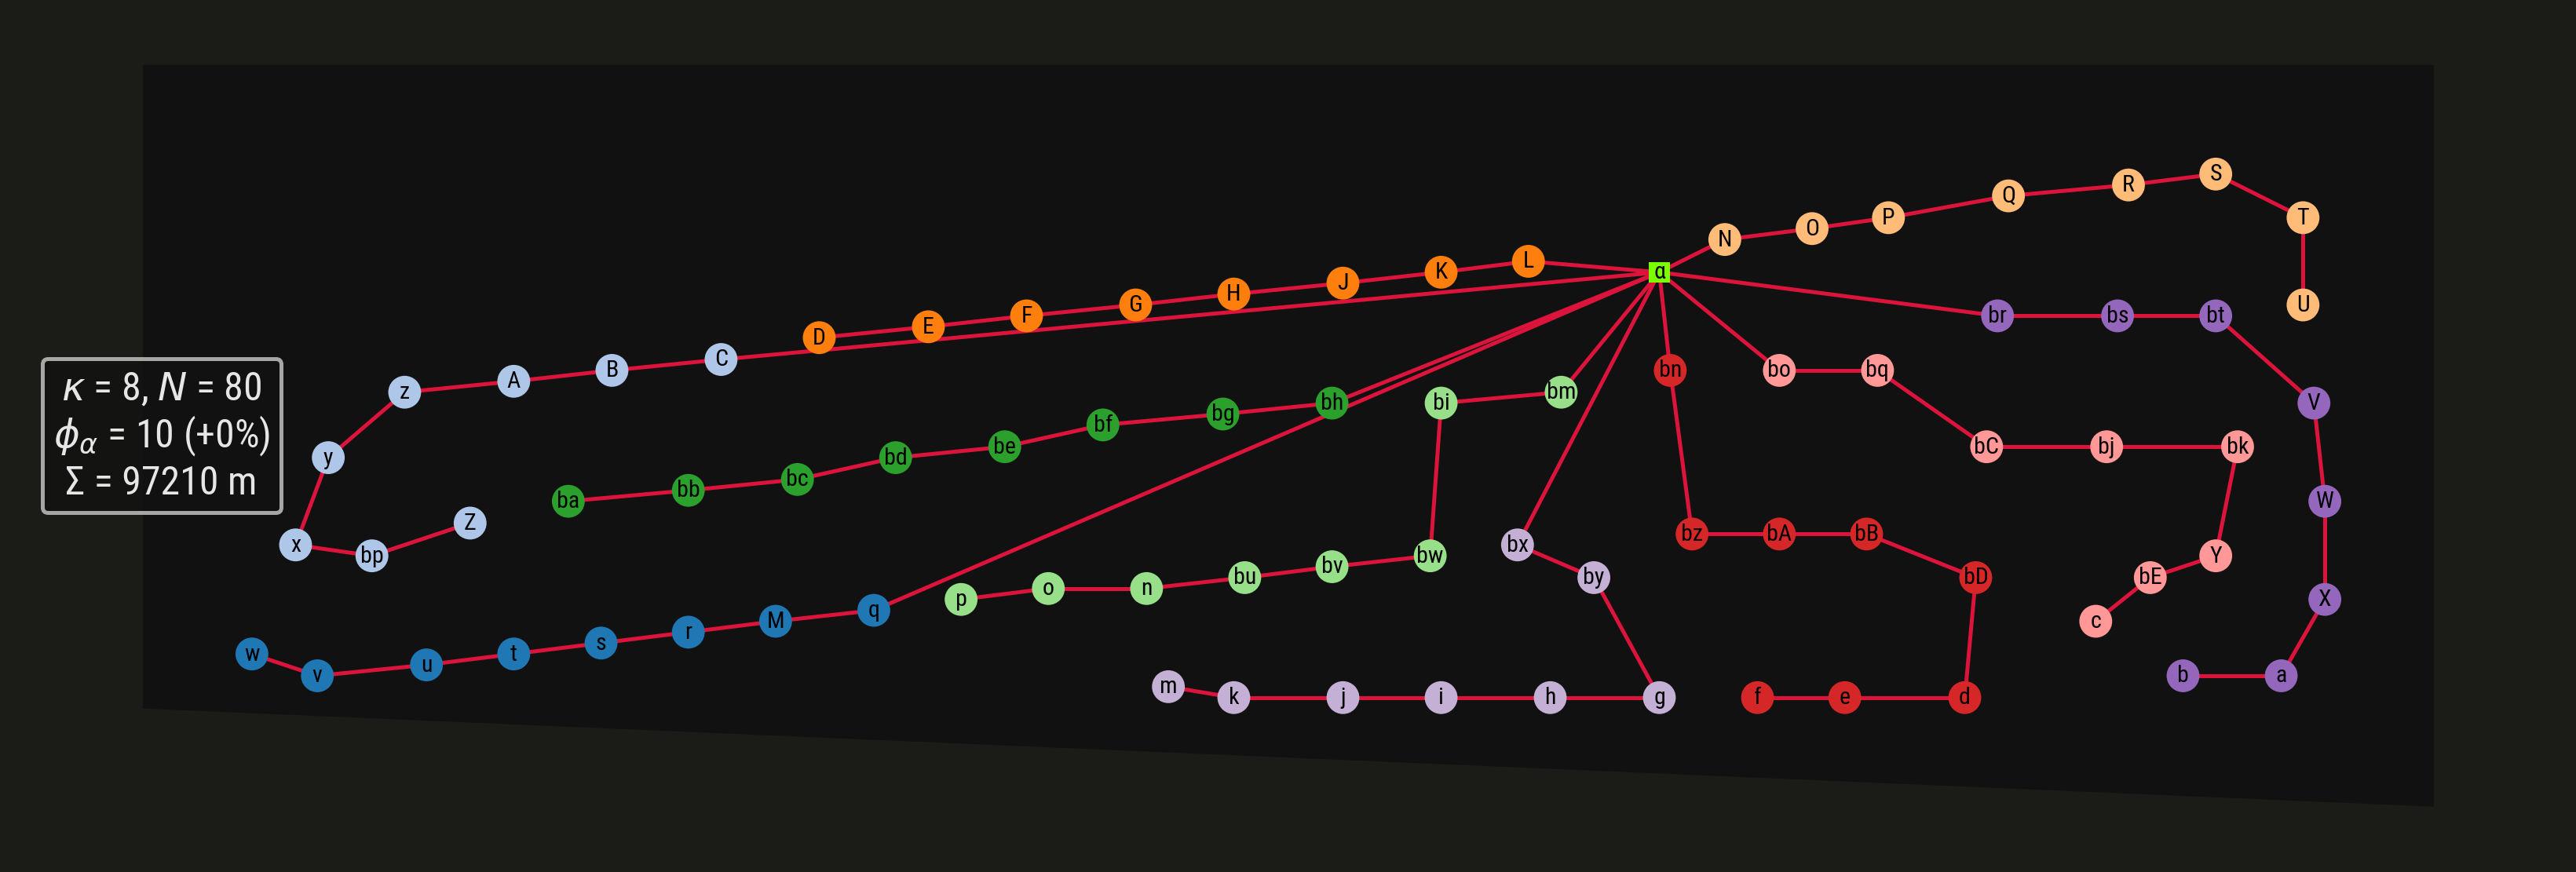

In [42]:
G = MILP_solution_to_G(p)
gplot(G, node_tag='label');

## Solve with CPLEX

In [51]:
solver = pyo.SolverFactory('cplex', solver_io='python')

### london, 13, using interarray.MILP

In [52]:
m = make_MILP_length(A_graph(g.london), 
                     gateXings_constraint=False,
                     gates_limit=False,
                     branching=True)

In [53]:
k = 13
p = m.create_instance(data={None: dict(k={None: k})}, name=f'{m.site["name"]}_k{k}')

In [55]:
solver.options = {
    'mipgap': 0.05,
    'timelimit': 15,
}
status = solver.solve(p, tee=True)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               15
CPXPARAM_MIP_Tolerances_MIPGap                   0.050000000000000003
Tried aggregator 1 time.
MIP Presolve eliminated 832 rows and 0 columns.
MIP Presolve modified 3582 coefficients.
Reduced MIP has 5180 rows, 3932 columns, and 18530 nonzeros.
Reduced MIP has 1966 binaries, 1966 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (18.11 ticks)
Found incumbent of value 927259.595503 after 0.06 sec. (39.33 ticks)
Probing time = 0.02 sec. (3.53 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 5180 rows, 3932 columns, and 18530 nonzeros.
Reduced MIP has 1966 binaries, 1966 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (12.00 ticks)
Probing time = 0.00 sec. (3.18 ticks)
Clique table members: 896.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Paralle

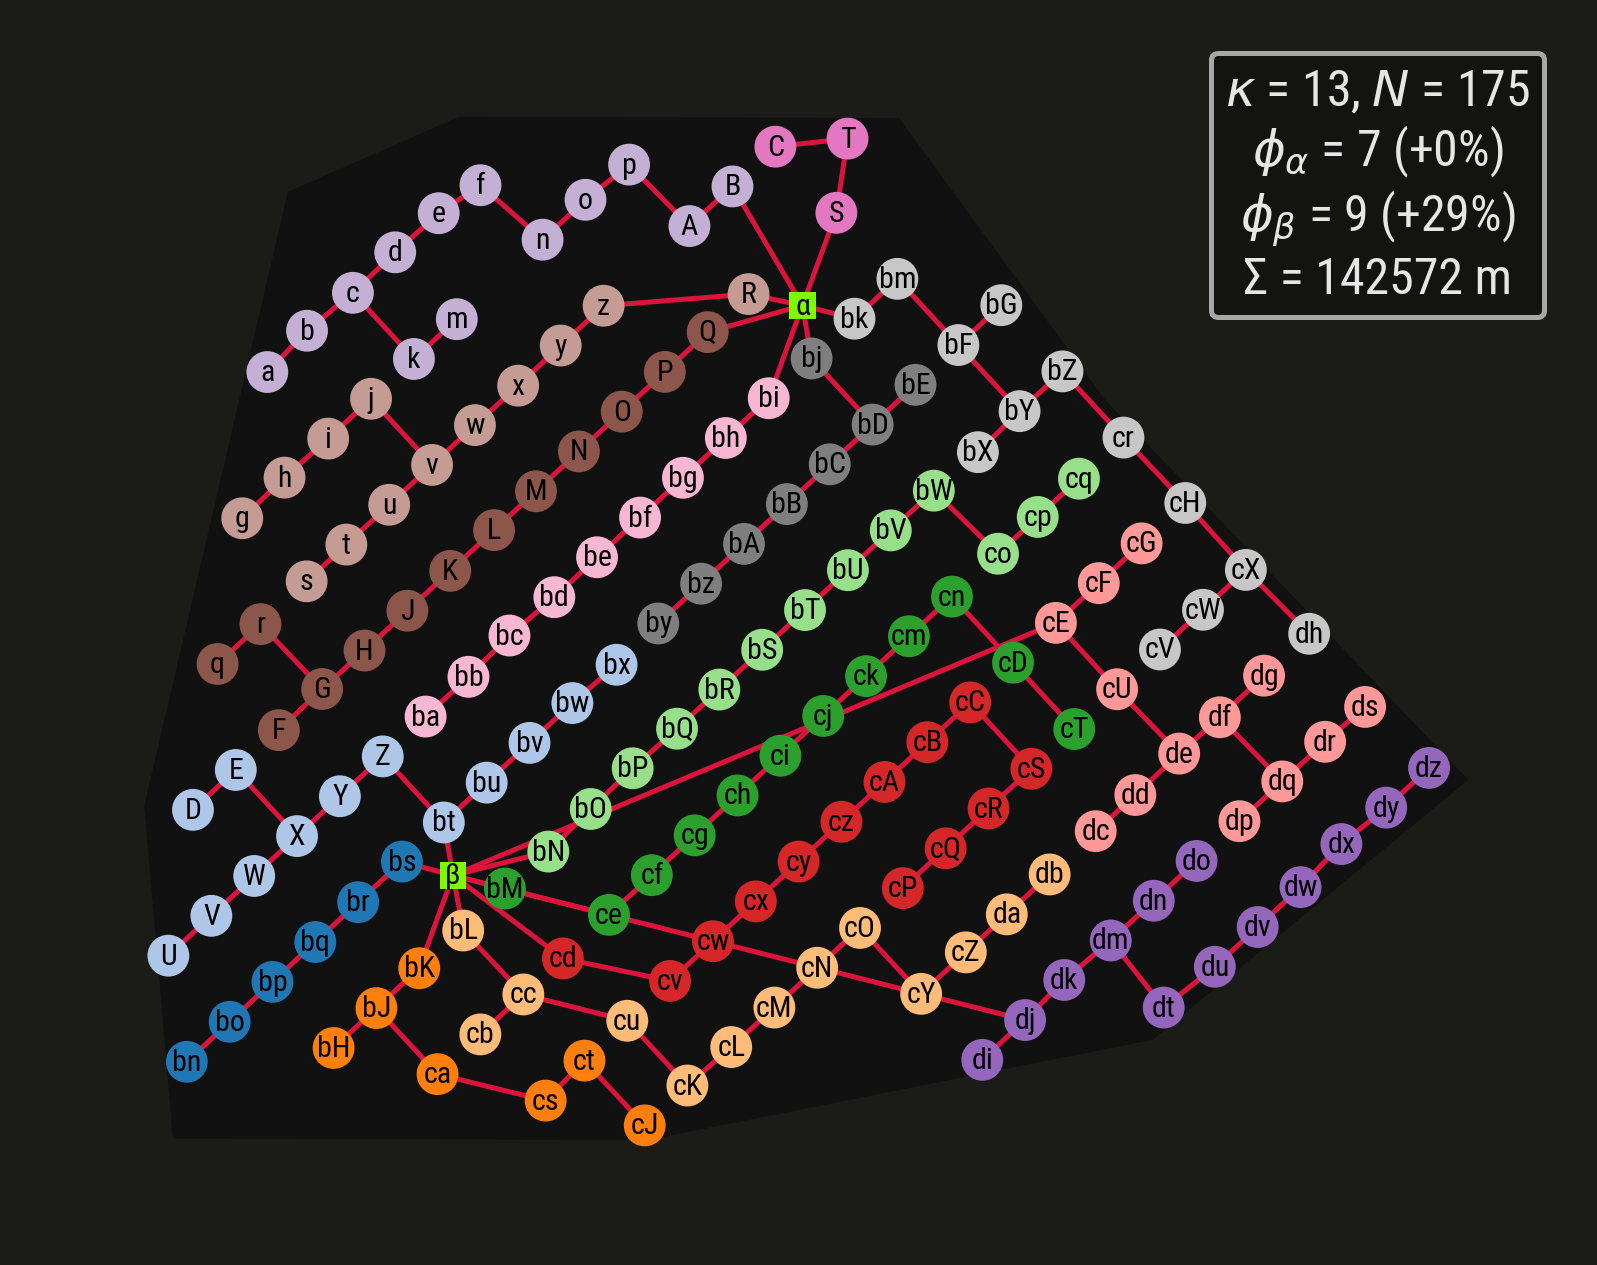

In [56]:
G = MILP_solution_to_G(p)
gplot(G, node_tag='label');

## Delve deeper into the solution

In [118]:
# Print the status of the solved LP
print("Status = %s" % status.solver.termination_condition)

# Print the value of the variables at the optimum
for n in p.N:
    print(f'{p.Bg[n]}: {pyo.value(p.Bg[n])}')

# Print the value of the objective
print("Objective = %f" % pyo.value(p.length))

Status = optimal
Bg[0]: -0.0
Bg[1]: -0.0
Bg[2]: -0.0
Bg[3]: -0.0
Bg[4]: -0.0
Bg[5]: -0.0
Bg[6]: -0.0
Bg[7]: 1.0
Bg[8]: 1.0
Bg[9]: -0.0
Bg[10]: -0.0
Bg[11]: -0.0
Bg[12]: -0.0
Bg[13]: -0.0
Bg[14]: -0.0
Bg[15]: 1.0
Bg[16]: -0.0
Bg[17]: -0.0
Bg[18]: -0.0
Bg[19]: -0.0
Bg[20]: -0.0
Bg[21]: -0.0
Bg[22]: 1.0
Bg[23]: -0.0
Bg[24]: -0.0
Bg[25]: -0.0
Bg[26]: -0.0
Bg[27]: -0.0
Bg[28]: -0.0
Bg[29]: -0.0
Objective = 16921.930293
